In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#The data sets have been opend in excel and slightly changed from the original
population_density_df = pd.read_csv("population-density.csv")
earth_quake_df_ori = pd.read_csv("earthquakes_1999-2020.csv",sep="\t",header = 0)
Income_p0p50_share_df_2000_2009 = pd.read_csv("Income_Data_2000_2009.csv",sep="\t",header = 0)
Income_p0p50_share_df_2010_2021 = pd.read_csv("Income_Data_2009_2021.csv",sep="\t",header = 0)

In [3]:
earth_quake_df_ori

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,Location Name,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Total Houses Damaged Description.1
0,1999,1,25,18.0,19.0,16.8,NaN,NaN,"COLOMBIA: ARMENIA, CALARCA, PEREIRA, CALDAS, ...","COLOMBIA: ARMENIA, CALARCA, PEREIRA, CALDAS, ...",...,3.0,4750.0,4.0,1857.366,4.0,NaN,4.0,NaN,NaN,NaN
1,1999,2,1,23.0,57.0,52.9,NaN,NaN,"RUSSIA: MAKHACHKALA, DAGESTAN","RUSSIA: MAKHACHKALA, DAGESTAN",...,NaN,NaN,NaN,0.900,1.0,NaN,NaN,NaN,NaN,NaN
2,1999,2,2,13.0,45.0,16.8,NaN,NaN,"SPAIN: MULA, PUEBLA DE MULA","SPAIN: MULA, PUEBLA DE MULA",...,NaN,20.0,1.0,44.004,4.0,NaN,NaN,NaN,3.0,3.0
3,1999,2,11,14.0,8.0,51.6,NaN,NaN,"AFGHANISTAN: LOWGAR, VARDAK, KABUL","AFGHANISTAN: LOWGAR, VARDAK, KABUL",...,NaN,500.0,3.0,NaN,3.0,7000.0,4.0,NaN,NaN,NaN
4,1999,3,4,5.0,38.0,26.5,NaN,NaN,IRAN: SOUTHERN: KERMAN,IRAN: SOUTHERN: KERMAN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,517.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2021,10,12,9.0,24.0,3.0,5817.0,NaN,GREECE: CRETE,GREECE: CRETE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0
1284,2021,10,15,20.0,18.0,21.0,NaN,NaN,"INDONESIA: BALI: KARANGASEM, BANGLI","INDONESIA: BALI: KARANGASEM, BANGLI",...,NaN,82.0,2.0,NaN,3.0,366.0,3.0,524.0,3.0,3.0
1285,2021,11,14,12.0,8.0,38.0,NaN,NaN,IRAN: HORMOZGAN PROVINCE,IRAN: HORMOZGAN PROVINCE,...,NaN,NaN,2.0,165.000,4.0,NaN,NaN,NaN,2.0,2.0
1286,2021,11,28,10.0,52.0,13.0,NaN,NaN,PERU: AMAZONAS,PERU: AMAZONAS,...,NaN,3.0,1.0,NaN,3.0,448.0,3.0,1699.0,4.0,4.0


In [4]:
earth_quake_df = earth_quake_df_ori

In [5]:
# Here new county and specific region columns were created by string splitting
earth_quake_df['Country'] = earth_quake_df['Country'].str.split(':', 1).str[0]
earth_quake_df['Region'] = earth_quake_df['Location Name'].str.split(',').str[-1]
earth_quake_df['Region'] = earth_quake_df['Region'].str.split(':').str[-1]
#del earth_quake_df["Location Name"]

In [6]:
earth_quake_df

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,Location Name,...,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Total Houses Damaged Description.1,Region
0,1999,1,25,18.0,19.0,16.8,NaN,NaN,COLOMBIA,"COLOMBIA: ARMENIA, CALARCA, PEREIRA, CALDAS, ...",...,4750.0,4.0,1857.366,4.0,NaN,4.0,NaN,NaN,NaN,HUILA
1,1999,2,1,23.0,57.0,52.9,NaN,NaN,RUSSIA,"RUSSIA: MAKHACHKALA, DAGESTAN",...,NaN,NaN,0.900,1.0,NaN,NaN,NaN,NaN,NaN,DAGESTAN
2,1999,2,2,13.0,45.0,16.8,NaN,NaN,SPAIN,"SPAIN: MULA, PUEBLA DE MULA",...,20.0,1.0,44.004,4.0,NaN,NaN,NaN,3.0,3.0,PUEBLA DE MULA
3,1999,2,11,14.0,8.0,51.6,NaN,NaN,AFGHANISTAN,"AFGHANISTAN: LOWGAR, VARDAK, KABUL",...,500.0,3.0,NaN,3.0,7000.0,4.0,NaN,NaN,NaN,KABUL
4,1999,3,4,5.0,38.0,26.5,NaN,NaN,IRAN,IRAN: SOUTHERN: KERMAN,...,NaN,NaN,NaN,2.0,NaN,NaN,517.0,3.0,3.0,KERMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2021,10,12,9.0,24.0,3.0,5817.0,NaN,GREECE,GREECE: CRETE,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,CRETE
1284,2021,10,15,20.0,18.0,21.0,NaN,NaN,INDONESIA,"INDONESIA: BALI: KARANGASEM, BANGLI",...,82.0,2.0,NaN,3.0,366.0,3.0,524.0,3.0,3.0,BANGLI
1285,2021,11,14,12.0,8.0,38.0,NaN,NaN,IRAN,IRAN: HORMOZGAN PROVINCE,...,NaN,2.0,165.000,4.0,NaN,NaN,NaN,2.0,2.0,HORMOZGAN PROVINCE
1286,2021,11,28,10.0,52.0,13.0,NaN,NaN,PERU,PERU: AMAZONAS,...,3.0,1.0,NaN,3.0,448.0,3.0,1699.0,4.0,4.0,AMAZONAS


In [7]:
Income_p0p50_share_df_2000_2009

,Country,Share,Year,Average Income
0,Afghanistan,pall,2000,1755.4281
1,Afghanistan,pall,2001,1640.3868
2,Afghanistan,pall,2002,2096.7658
3,Afghanistan,pall,2003,2414.1680
4,Afghanistan,pall,2004,2374.5369
...,...,...,...,...
5675,Zimbabwe,p0p50,2005,0.1181
5676,Zimbabwe,p0p50,2006,0.1181
5677,Zimbabwe,p0p50,2007,0.1181
5678,Zimbabwe,p0p50,2008,0.1181


In [8]:
population_density_df

,Entity,Code,Year,Population density
0,Afghanistan,AFG,-10000,0.022595
1,Afghanistan,AFG,-9000,0.031285
2,Afghanistan,AFG,-8000,0.043318
3,Afghanistan,AFG,-7000,0.059979
4,Afghanistan,AFG,-6000,0.083047
...,...,...,...,...
76675,Zimbabwe,ZWE,2096,91.688260
76676,Zimbabwe,ZWE,2097,91.812850
76677,Zimbabwe,ZWE,2098,91.925230
76678,Zimbabwe,ZWE,2099,92.024760


In [9]:
# change to upperchase letters such that compatible with earth_quake_df
Income_p0p50_share_df_2000_2009["Country"] = Income_p0p50_share_df_2000_2009["Country"].str.upper()
Income_p0p50_share_df_2010_2021["Country"] = Income_p0p50_share_df_2010_2021["Country"].str.upper()
population_density_df["Country"] = population_density_df["Entity"].str.upper()
del population_density_df["Entity"]
del population_density_df["Code"]
Income_df_2000_2009 = Income_p0p50_share_df_2000_2009[Income_p0p50_share_df_2000_2009["Share"] == "pall"]
Income_df_2010_2021 = Income_p0p50_share_df_2010_2021[Income_p0p50_share_df_2010_2021["Share"] == "pall"]
Share_df_2000_2009 = Income_p0p50_share_df_2000_2009[Income_p0p50_share_df_2000_2009["Share"] == "p0p50"]
Share_df_2010_2021 = Income_p0p50_share_df_2010_2021[Income_p0p50_share_df_2010_2021["Share"] == "p0p50"]
del Income_df_2000_2009["Share"]
del Income_df_2010_2021["Share"]
Income_df_2000_2020 = pd.concat([Income_df_2000_2009, Income_df_2010_2021])
Share_df_2000_2020 = pd.concat([Share_df_2000_2009,Share_df_2010_2021])
Share_df_2000_2020["p0p50_share"] = Share_df_2000_2020["Average Income"]
del Share_df_2000_2020["Average Income"]
del Share_df_2000_2020["Share"]


In [10]:
master_df = pd.merge(earth_quake_df, Income_df_2000_2020, on=["Country","Year"])
master_df = pd.merge(master_df, Share_df_2000_2020, on=["Country","Year"])
master_df = pd.merge(master_df,population_density_df,on =["Country", "Year"])
master_df = master_df.rename(columns={"Population density": "Population density national"})

In [11]:
master_df

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,Location Name,...,Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Total Houses Damaged Description.1,Region,Average Income,p0p50_share,Population density national
0,2000,1,11,23.0,43.0,56.4,NaN,NaN,CHINA,CHINA: LIAONING PROVINCE,...,3.0,3600.0,4.0,8800.0,4.0,4.0,LIAONING PROVINCE,4836.4401,0.1737,134.647500
1,2000,1,14,23.0,37.0,7.8,NaN,NaN,CHINA,CHINA: YUNNAN PROVINCE: YAOAN COUNTY,...,4.0,41000.0,4.0,NaN,NaN,NaN,YAOAN COUNTY,4836.4401,0.1737,134.647500
2,2000,6,7,21.0,46.0,55.9,NaN,NaN,CHINA,CHINA: YUNNAN PROVINCE: LIUKU; MYANMAR,...,1.0,NaN,2.0,NaN,NaN,NaN,LIUKU; MYANMAR,4836.4401,0.1737,134.647500
3,2000,8,21,13.0,25.0,44.5,NaN,NaN,CHINA,CHINA: YUNNAN PROVINCE: WUDING,...,4.0,NaN,NaN,NaN,NaN,NaN,WUDING,4836.4401,0.1737,134.647500
4,2000,2,2,22.0,58.0,1.5,NaN,NaN,IRAN,"IRAN: BARDASKAN, KASHMAR",...,2.0,100.0,2.0,300.0,3.0,3.0,KASHMAR,13549.8134,0.1232,40.397152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2020,6,7,5.0,27.0,22.0,NaN,NaN,PERU,PERU: COAST: CHIMBOTE,...,NaN,NaN,NaN,NaN,NaN,NaN,CHIMBOTE,11865.0324,0.0572,26.019350
1026,2020,6,23,15.0,29.0,5.0,5751.0,NaN,MEXICO,MEXICO: OAXACA,...,4.0,NaN,NaN,8123.0,4.0,4.0,OAXACA,17509.5857,0.0602,64.815605
1027,2020,7,17,2.0,50.0,23.0,NaN,NaN,PAPUA NEW GUINEA,"PAPUA NEW GUINEA: MOROBE, ORO",...,1.0,NaN,NaN,12.0,1.0,1.0,ORO,4920.7312,0.1291,21.529040
1028,2020,8,18,0.0,3.0,48.0,NaN,NaN,PHILIPPINES,PHILIPPINES: MASBATE,...,1.0,138.0,3.0,1167.0,4.0,4.0,MASBATE,9596.5646,0.1435,376.265170


## Data cleaning
- make new df with only wanted columns
- check for NAN values
- Insert values into NAN or drop


In [12]:
columns_of_choice = ["Year","Mo","Dy","Hr","Country","Region","Focal Depth (km)", "Mag",  "Average Income", "p0p50_share", "Population density national", "Total Deaths","Total Injuries","Total Damage ($Mil)", "Total Houses Destroyed","Total Houses Damaged","Total Death Description","Total Injuries Description","Total Damage Description", "Total Houses Destroyed Description","Total Houses Damaged Description"]
cleaned_df = master_df[columns_of_choice]
cleaned_df

,Year,Mo,Dy,Hr,Country,Region,Focal Depth (km),Mag,Average Income,p0p50_share,...,Total Deaths,Total Injuries,Total Damage ($Mil),Total Houses Destroyed,Total Houses Damaged,Total Death Description,Total Injuries Description,Total Damage Description,Total Houses Destroyed Description,Total Houses Damaged Description
0,2000,1,11,23.0,CHINA,LIAONING PROVINCE,10.0,5.1,4836.4401,0.1737,...,NaN,30.0,NaN,3600.0,8800.0,NaN,1.0,3.0,4.0,4.0
1,2000,1,14,23.0,CHINA,YAOAN COUNTY,33.0,5.9,4836.4401,0.1737,...,7.0,2528.0,73.50,41000.0,NaN,1.0,4.0,4.0,4.0,NaN
2,2000,6,7,21.0,CHINA,LIUKU; MYANMAR,33.0,6.3,4836.4401,0.1737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN
3,2000,8,21,13.0,CHINA,WUDING,33.0,4.2,4836.4401,0.1737,...,1.0,406.0,43.00,NaN,NaN,1.0,3.0,4.0,NaN,NaN
4,2000,2,2,22.0,IRAN,KASHMAR,33.0,5.3,13549.8134,0.1232,...,1.0,15.0,NaN,100.0,300.0,1.0,1.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2020,6,7,5.0,PERU,CHIMBOTE,57.0,4.5,11865.0324,0.0572,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1026,2020,6,23,15.0,MEXICO,OAXACA,26.0,7.4,17509.5857,0.0602,...,10.0,24.0,NaN,NaN,8123.0,1.0,1.0,4.0,NaN,4.0
1027,2020,7,17,2.0,PAPUA NEW GUINEA,ORO,80.0,7.0,4920.7312,0.1291,...,1.0,1.0,NaN,NaN,12.0,1.0,1.0,1.0,NaN,1.0
1028,2020,8,18,0.0,PHILIPPINES,MASBATE,10.0,6.6,9596.5646,0.1435,...,2.0,50.0,0.57,138.0,1167.0,1.0,1.0,1.0,3.0,4.0


In [13]:
cleaned_df.dtypes

Year                                    int64
Mo                                      int64
Dy                                      int64
Hr                                    float64
Country                                object
Region                                 object
Focal Depth (km)                      float64
Mag                                   float64
Average Income                        float64
p0p50_share                           float64
Population density national           float64
Total Deaths                          float64
Total Injuries                        float64
Total Damage ($Mil)                   float64
Total Houses Destroyed                float64
Total Houses Damaged                  float64
Total Death Description               float64
Total Injuries Description            float64
Total Damage Description              float64
Total Houses Destroyed Description    float64
Total Houses Damaged Description      float64
dtype: object

In [14]:
cleaned_df.describe()

,Year,Mo,Dy,Hr,Focal Depth (km),Mag,Average Income,p0p50_share,Population density national,Total Deaths,Total Injuries,Total Damage ($Mil),Total Houses Destroyed,Total Houses Damaged,Total Death Description,Total Injuries Description,Total Damage Description,Total Houses Destroyed Description,Total Houses Damaged Description
count,1030.000000,1030.000000,1030.000000,1030.000000,1019.000000,1027.000000,1030.000000,1010.000000,1030.000000,462.000000,604.000000,157.000000,2.970000e+02,3.080000e+02,462.000000,646.000000,882.000000,429.000000,503.000000
mean,2009.909709,6.497087,15.340777,11.462136,26.353288,5.871568,15329.388139,0.139579,151.682764,1778.580087,2197.028146,3543.736191,3.071535e+04,8.103456e+04,1.283550,1.716718,1.946712,2.400932,2.564612
std,5.722664,3.467115,8.682130,7.160253,41.776757,1.036041,10635.497025,0.035454,150.665376,18957.756149,21622.964525,19152.856102,3.147370e+05,1.196714e+06,0.739137,1.004763,1.090926,1.192891,1.163565
min,2000.000000,1.000000,1.000000,0.000000,0.000000,2.100000,1306.327300,0.052400,2.472429,1.000000,1.000000,0.300000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2005.000000,4.000000,8.000000,5.000000,10.000000,5.200000,6671.993775,0.123200,45.014181,1.000000,6.000000,17.000000,2.000000e+01,9.000000e+01,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2009.000000,7.000000,15.000000,11.000000,14.000000,5.800000,12555.078450,0.142100,120.140135,3.000000,25.000000,100.000000,2.450000e+02,7.000000e+02,1.000000,1.000000,2.000000,2.000000,3.000000
75%,2015.000000,9.000000,23.000000,18.000000,32.000000,6.600000,20061.571200,0.164900,151.778640,13.000000,130.000000,700.000000,2.500000e+03,3.056500e+03,1.000000,3.000000,3.000000,3.000000,4.000000
max,2020.000000,12.000000,31.000000,23.000000,664.000000,9.100000,64064.234200,0.259900,1139.979500,316000.000000,374171.000000,220136.600000,5.360000e+06,2.100000e+07,4.000000,4.000000,4.000000,4.000000,4.000000


In [15]:
cleaned_df.isna().sum()

Year                                    0
Mo                                      0
Dy                                      0
Hr                                      0
Country                                 0
Region                                  0
Focal Depth (km)                       11
Mag                                     3
Average Income                          0
p0p50_share                            20
Population density national             0
Total Deaths                          568
Total Injuries                        426
Total Damage ($Mil)                   873
Total Houses Destroyed                733
Total Houses Damaged                  722
Total Death Description               568
Total Injuries Description            384
Total Damage Description              148
Total Houses Destroyed Description    601
Total Houses Damaged Description      527
dtype: int64

In [16]:
#I suspect that NaN could be 0 in many cases. Here I explore the data where NaN Total Deaths are reported.
cleaned_df_temp = cleaned_df[cleaned_df["Total Deaths"].isna()]

In [17]:
cleaned_df["Total Deaths"] = cleaned_df["Total Deaths"].fillna(0)
cleaned_df["Total Death Description"] = cleaned_df["Total Death Description"].fillna(0)

/tmp/ipykernel_7621/2355338700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Total Deaths"] = cleaned_df["Total Deaths"].fillna(0)
/tmp/ipykernel_7621/2355338700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Total Death Description"] = cleaned_df["Total Death Description"].fillna(0)


In [18]:
#In this case some entries seem to realy be missing values of Total Injuries.
cleaned_df_temp = cleaned_df[cleaned_df["Total Injuries"].isna()]
fig = px.box(cleaned_df, x ="Total Injuries Description", y="Total Injuries")
fig.update_layout(title='Box plot', xaxis_title='Injuries Category', yaxis_title='Injuries Count')
fig.show()
# Category 1: 1-50 Cat.2: 51-100, Cat.3: 101 - 1000 Cat.4: 1001 - inf

In [19]:
mean_value_Total_inj_cat = cleaned_df.groupby(["Total Injuries Description"])["Total Injuries"].transform("mean")
cleaned_df["Total Injuries"] = cleaned_df["Total Injuries"].fillna(mean_value_Total_inj_cat)
cleaned_df["Total Injuries"] = cleaned_df["Total Injuries"].fillna(0)
cleaned_df["Total Injuries Description"] = cleaned_df["Total Injuries Description"].fillna(0)

/tmp/ipykernel_7621/3639012710.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7621/3639012710.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7621/3639012710.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
mean_value_total_house_dest_cat = cleaned_df.groupby(["Total Houses Destroyed Description"])["Total Houses Destroyed"].transform("mean")
cleaned_df["Total Houses Destroyed"] = cleaned_df["Total Houses Destroyed"].fillna(mean_value_total_house_dest_cat)
cleaned_df["Total Houses Destroyed"] = cleaned_df["Total Houses Destroyed"].fillna(0)
cleaned_df["Total Houses Destroyed Description"] = cleaned_df["Total Houses Destroyed Description"].fillna(0)

mean_value_total_house_dam_cat = cleaned_df.groupby(["Total Houses Damaged Description"])["Total Houses Damaged"].transform("mean")
cleaned_df["Total Houses Damaged"] = cleaned_df["Total Houses Damaged"].fillna(mean_value_total_house_dam_cat)
cleaned_df["Total Houses Damaged"] = cleaned_df["Total Houses Damaged"].fillna(0)
cleaned_df["Total Houses Damaged Description"] = cleaned_df["Total Houses Damaged Description"].fillna(0)

mean_value_total_dam_cat = cleaned_df.groupby(["Total Damage Description"])["Total Damage ($Mil)"].transform("mean")
cleaned_df["Total Damage ($Mil)"] = cleaned_df["Total Damage ($Mil)"].fillna(mean_value_total_dam_cat)


cleaned_df.isna().sum()

/tmp/ipykernel_7621/1564956375.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7621/1564956375.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7621/1564956375.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7621

Year                                    0
Mo                                      0
Dy                                      0
Hr                                      0
Country                                 0
Region                                  0
Focal Depth (km)                       11
Mag                                     3
Average Income                          0
p0p50_share                            20
Population density national             0
Total Deaths                            0
Total Injuries                          0
Total Damage ($Mil)                   148
Total Houses Destroyed                  0
Total Houses Damaged                    0
Total Death Description                 0
Total Injuries Description              0
Total Damage Description              148
Total Houses Destroyed Description      0
Total Houses Damaged Description        0
dtype: int64

In [21]:
# Not sure if setting the missing values for Total Damage to 0 is the way to go. Is 0 damage realistic? We shoud take a look at these entries.

## EDA


IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

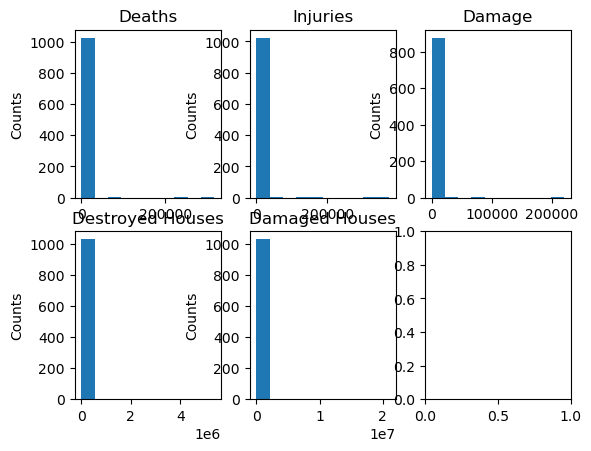

In [23]:
plt.figure()
hsit_data = [cleaned_df["Total Deaths"],cleaned_df["Total Injuries"],cleaned_df["Total Damage ($Mil)"],cleaned_df["Total Houses Destroyed"], cleaned_df["Total Houses Damaged"]]
titles = ['Deaths',"Injuries",'Damage','Destroyed Houses', "Damaged Houses"] 

f,a = plt.subplots(2,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(hsit_data[idx])
    ax.set_title(titles[idx])
    ax.set_ylabel("Counts")
plt.tight_layout()
plt.show() 
plt.close()

In [25]:
corr = cleaned_df["Focal Depth (km)", "Mag",  "Average Income", "p0p50_share", "Population density national", "Total Deaths","Total Injuries","Total Damage ($Mil)", "Total Houses Destroyed","Total Houses Damaged","Total Death Description","Total Injuries Description","Total Damage Description", "Total Houses Destroyed Description","Total Houses Damaged Description"].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
);

KeyError: ('Focal Depth (km)', 'Mag', 'Average Income', 'p0p50_share', 'Population density national', 'Total Deaths', 'Total Injuries', 'Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Houses Damaged', 'Total Death Description', 'Total Injuries Description', 'Total Damage Description', 'Total Houses Destroyed Description', 'Total Houses Damaged Description')